In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import seaborn
seaborn.set(font_scale=2)
seaborn.set_style('whitegrid')
clrs = seaborn.color_palette()




In [6]:
W = np.random.random(2)*3

In [7]:
# Now some x-locations

x_1 = np.repeat([1,2,3,8,9,12,13,14,15],2)
x_0 = 1

x = np.vstack([[x_0]*np.product(x_1.shape),x_1])

In [23]:
# now lets define a noise model
noiseVar = 3
noise = lambda s: np.random.normal(loc=0,scale=noiseVar,size=s)

In [24]:
## Now lets generate some fake data
y = x.T.dot(W) + noise(x_1.shape)

In [25]:
from scipy.stats import multivariate_normal

prior_cov = np.eye(2)*3
prior_w = multivariate_normal(mean=[0,0],
                              cov=prior_cov)

##  Plot data with some samples drawn from the prior

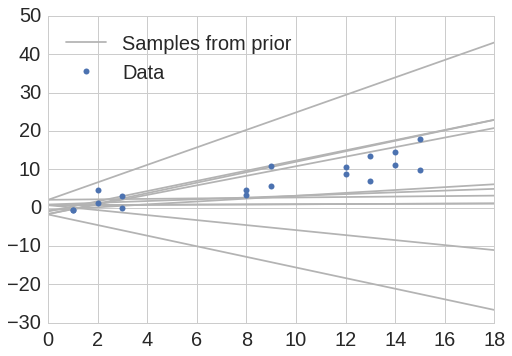

In [26]:
sample_x1s = np.linspace(0,np.max(x_1)+3,num=100)
sample_xs = np.vstack([[x_0]*len(sample_x1s),sample_x1s])
for i in range(10):
    sample_ws = prior_w.rvs()
    plt.plot(sample_x1s,sample_xs.T.dot(sample_ws),color=[.7]*3)
plt.plot(sample_x1s,sample_xs.T.dot(sample_ws),color=[.7]*3,label='Samples from prior')

plt.plot(x_1,y,'o',markersize=6,label='Data')
plt.legend(loc='best')

## Now Calculate the Posterior Distribution 

In [27]:
posterior_cov = np.linalg.inv((noiseVar**-2)*x.dot(x.T) + np.linalg.inv(prior_cov))
posterior_mu = (noiseVar**-2)*posterior_cov.dot(x).dot(y)

###Define the posterior distribution
posterior = multivariate_normal(mean=posterior_mu,cov=posterior_cov)

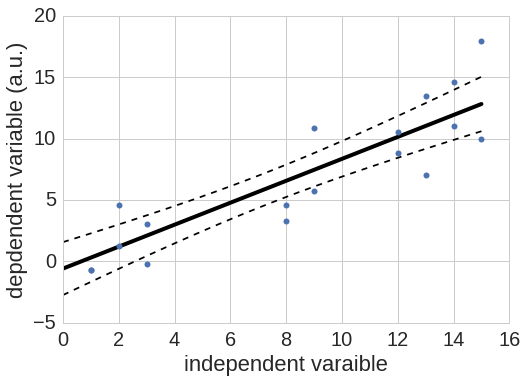

In [29]:
sample_x1s = np.linspace(0,15,num=100)
sample_xs = np.vstack([[x_0]*len(sample_x1s),sample_x1s])

post_pred_var = np.diag(sample_xs.T.dot(posterior_cov).dot(sample_xs))
#for i in range(6):
#    sample_ws = posterior.rvs()
#    plt.plot(sample_x1s,sample_xs.T.dot(sample_ws),color=[.7]*3)
#plt.plot(sample_x1s,sample_xs.T.dot(sample_ws),color=[.7]*3,label='Samples from prior')


plt.plot(sample_x1s,sample_xs.T.dot(posterior_mu),linewidth=4,color='k')
plt.plot(sample_x1s,sample_xs.T.dot(posterior_mu)-np.sqrt(post_pred_var)*2,'--',color='k')
plt.plot(sample_x1s,sample_xs.T.dot(posterior_mu)+np.sqrt(post_pred_var)*2,'--',
         color='k',label=r'$\pm2SD of PP Dist$')

plt.plot(x_1,y,'o',markersize=6,label='Data')
plt.xlabel('independent varaible')
plt.ylabel('depdendent variable (a.u.)')
#plt.legend(loc='best')